This notebook will be used to test the script defined in this folder.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import imp
import sys
sys.path.append("/Users/sandesh/repos/quantum-ml/Nanowire Model/")

## Testing of the potential profile script

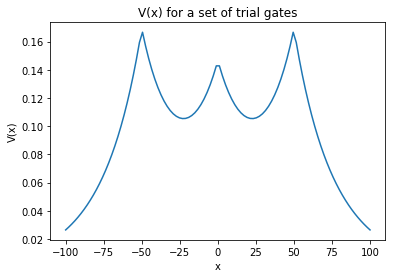

In [11]:
import potential_profile
N_grid = 100
x = np.linspace(-100,100,N_grid,endpoint=True)

# trial potential profile
gate1 = {'peak' : 150e-3,'mean' : -50,'rho' : 5, 'h' : 50,'screen' : 25,'alpha' : 1.0}
gate2 = {'peak' : 100e-3,'mean' : 0,'rho' : 5, 'h' : 50,'screen' : 25,'alpha' : 1.0}
gate3 = {'peak' : 150e-3,'mean' : 50,'rho' : 5, 'h' : 50,'screen' : 25,'alpha' : 1.0}
trial_gates = {'gate1' : gate1,'gate2' : gate2, 'gate3' : gate3}
    
V = potential_profile.calc_V(x,trial_gates)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

## Testing of the ThomasFermi class

{'cap_model': (array([ 0.52644498,  2.59020709]), array([[ 0.00304046,  0.00025897],
       [ 0.00025897,  0.0019458 ]])), 'tunnel_vec': array([ 0.00028907,  0.00088673,  0.00385482]), 'charge': (0, 3), 'sensor': [0.058620945684599531], 'current': 0.00020570742684534988, 'state': 2}
islands [array([36, 42]), array([56, 72])]
barriers [[20 36]
 [42 56]
 [72 76]]
all_islands [[  0  20]
 [ 36  42]
 [ 56  72]
 [ 76 100]]


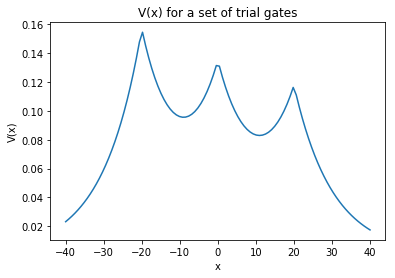

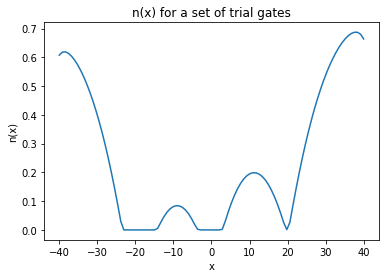

In [70]:
import potential_profile
import thomas_fermi
imp.reload(thomas_fermi)

# trial potential profile
N_grid = 100
system_size = 80
x = np.linspace(-system_size/2,system_size/2,N_grid,endpoint=True)

gate1 = {'peak' : 140e-3,'mean' : -20,'rho' : 20, 'h' : 50,'screen' : 10,'alpha' : 1.0}
gate2 = {'peak' : 100e-3,'mean' : 0,'rho' : 20, 'h' : 50,'screen' : 10,'alpha' : 1.0}
gate3 = {'peak' : 100e-3,'mean' : 20,'rho' : 20, 'h' : 50,'screen' : 10,'alpha' : 1.0}
gates = {'gate1' : gate1,'gate2' : gate2, 'gate3' : gate3}

V = potential_profile.calc_V(x,gates)
plt.figure(1)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

physics = {'x' : x,
           'V' : V,
           'K_0' : 1e-2, 
           'sigma' : 1.0,
           'mu' : 0.1,
           'D' : 2,
           'g_0' : 6e0,
           'c_k' : 1e-3,
           'beta' : 1000,
           'kT' : 1e-5,
           'WKB_coeff' : 1,
           'barrier_tunnel_rate' : 10.0,
           'V_L' : 100e-6,
           'V_R' : -100e-6,
           'short_circuit_current' : 1.0,
           'attempt_rate_coef' : 1,
           'sensors' : [(0,50)],
           'barrier_current' : 1.0,
           }
K_mat = thomas_fermi.calc_K_mat(x,physics['K_0'],physics['sigma'])
physics['K_mat'] = K_mat
physics['bias'] = physics['V_L'] - physics['V_R']

tf = thomas_fermi.ThomasFermi(physics)
output = tf.output_wrapper()

print(output)
print("islands",tf.islands)
print("barriers",tf.barriers)
print("all_islands",tf.all_islands)

plt.figure(2)
plt.plot(x,tf.n)
plt.xlabel('x')
plt.ylabel('n(x)')
plt.title("n(x) for a set of trial gates");

# Testing of Random Single Dot script

In [676]:
import random_single_dot
imp.reload(potential_profile)
imp.reload(thomas_fermi)
imp.reload(random_single_dot)

result = random_single_dot.calc_plunger_trace(256)

/Users/sandesh/repos/quantum-ml/Nanowire Model/thomas_fermi.py:80: RuntimeWarning: overflow encountered in exp
  output = (g_0/beta) * np.log(1 + np.exp(beta * x))
/Users/sandesh/repos/quantum-ml/Nanowire Model/thomas_fermi.py:94: RuntimeWarning: invalid value encountered in subtract
  if (i > 10) and (np.linalg.norm(n - n_prev)**2 < (1e-12) * np.linalg.norm(n) * np.linalg.norm(n_prev)):


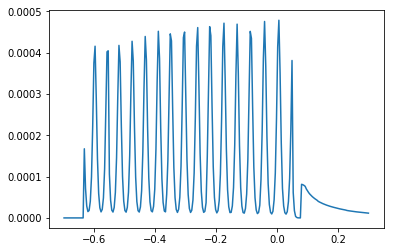

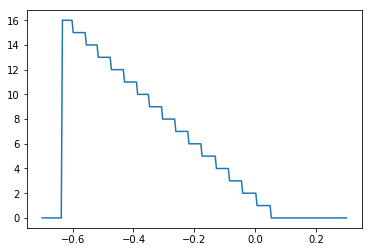

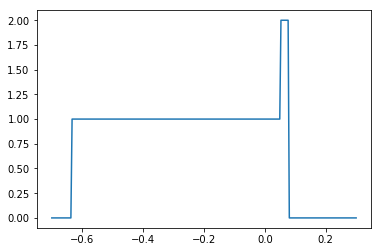

In [677]:
V_P_vec = result['V_P_vec']
current_vec = [x['current'] for x in result['output']]
charge_vec = [np.sum(x['charge']) for x in result['output']]
state_vec = np.array([x['state'] for x in result['output']])
plt.figure(1)
plt.plot(V_P_vec,current_vec)
plt.figure(2)
plt.plot(V_P_vec,charge_vec)
plt.figure(3)
plt.plot(V_P_vec,state_vec)

## Single Dot Barrier map

In [86]:
import random_single_dot
imp.reload(random_single_dot)
imp.reload(thomas_fermi)
imp.reload(potential_profile)

N_v = 100
st = time.time()
res = random_single_dot.calc_barrier_map(N_v,V_p = 100e-3)
print("Total time",time.time()-st)

Total time 5.188630104064941


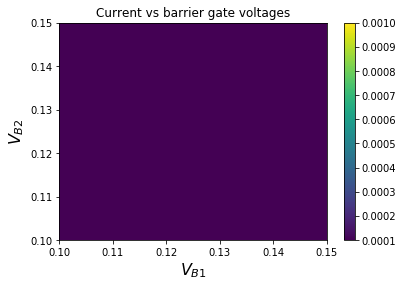

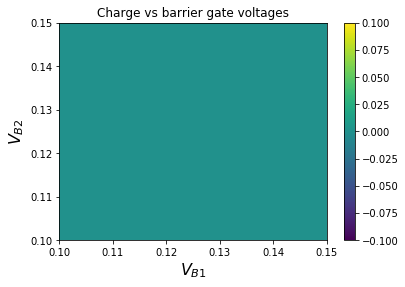

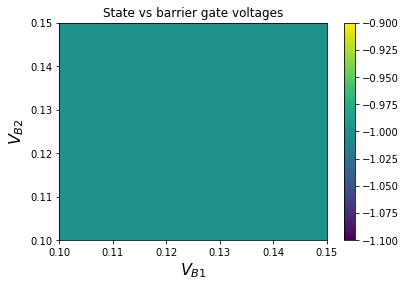

In [87]:
V_B1= np.array(res['V_B1_vec'])
V_B2= np.array(res['V_B2_vec'])
XX,YY = np.meshgrid(V_B1,V_B2)


current_vec = np.array([x['current'] for x in res['output']])
charge_vec = np.array([np.sum(x['charge']) for x in res['output']])
state_vec = np.array([x['state'] for x in res['output']])

plt.figure(1)
plt.pcolor(XX,YY,current_vec.reshape(N_v,N_v),vmax=1e-3)
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.colorbar()
plt.title("Current vs barrier gate voltages")
plt.figure(2)
plt.pcolor(XX,YY,charge_vec.reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Charge vs barrier gate voltages")
cbar = plt.colorbar()
plt.figure(3)
plt.pcolor(XX,YY,state_vec.reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("State vs barrier gate voltages")
cbar = plt.colorbar()

## Single Dot Full map

In [ ]:
import random_single_dot
imp.reload(random_single_dot)
imp.reload(thomas_fermi)
imp.reload(potential_profile)

N_v = 100
st = time.time()
res = random_single_dot.calc_full_map(N_v)
print("Total time",time.time()-st)

In [52]:
import glob
files = glob.glob("/Users/sandesh/data/quantum-ml/single_dot/*full_map*")
print(files)

['/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-014850.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-031743.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-033822.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-035951.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-042108.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-044158.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-101701.npy']


In [54]:
def load_full_map(file):
    res = np.load(file).item()
    V_B1= np.array(res['V_B1_vec'])
    V_P= np.array(res['V_P_vec'])
    V_B2= np.array(res['V_B2_vec'])
    XX,YY = np.meshgrid(V_B1,V_B2)

    current_vec = []
    charge_vec = []
    state_vec = []
    for ele in res['output']:
        current_vec.append(ele['current'])
        charge_vec.append(ele['charge'])
        state_vec.append(ele['state'])

    current_vec = np.array(current_vec).reshape(N_v,N_v,N_v)
    charge_vec = np.array(charge_vec).reshape(N_v,N_v,N_v)
    state_vec = np.array(state_vec).reshape(N_v,N_v,N_v)
    return XX,YY,current_vec,charge_vec,state_vec

In [55]:
%lprun -f load_full_map XX,YY,current_vec,charge_vec,state_vec = load_full_map(files[-1])

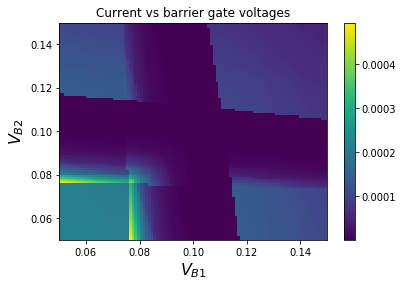

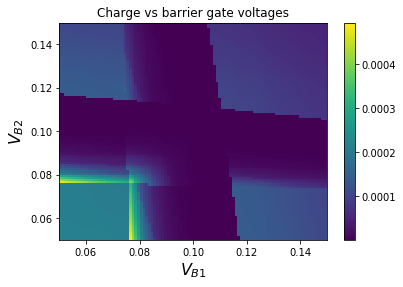

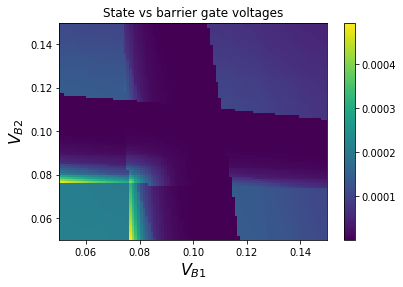

In [63]:
plunger_index = 70
plt.figure(1)
plt.pcolor(XX,YY,current_vec[:,plunger_index,:])
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.colorbar()
plt.title("Current vs barrier gate voltages")

plt.figure(2)
plt.pcolor(XX,YY,charge_vec[:,plunger_index,:])
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.colorbar()
plt.title("Charge vs barrier gate voltages")

plt.figure(3)
plt.pcolor(XX,YY,state_vec[:,plunger_index,:])
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.colorbar()
plt.title("State vs barrier gate voltages")

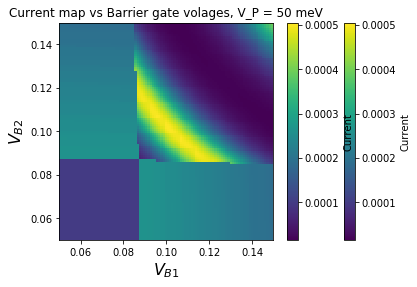

In [64]:
# animation
import matplotlib.animation as animation
plt.rcParams['animation.ffmpeg_path'] ='/usr/local/bin/ffmpeg'

fig, ax = plt.subplots(1,1)

def animate(i):
    line = ax.pcolor(XX,YY,current_vec[:,i,:])
    ax.set_title(r'Current map vs Barrier gate volages, V_P = ' +  str(50 + i) + ' meV') 
    #line = ax[1].pcolor(XX,YY,charge_vec[:,i,:])
    #line = ax[2].pcolor(XX,YY,state_vec[:,i,:])
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line = ax.pcolor(XX,YY,current_vec[:,0,:])
    cbar_0 = plt.colorbar(line,ax=ax)
    ax.set_xlabel(r'$V_{B1}$',fontsize=16)
    ax.set_ylabel(r'$V_{B2}$',fontsize=16)
    ax.set_title(r'Current map vs Barrier gate volages, V_P = 50 meV')
    cbar_0.set_label('Current')
    
    #line = ax[1].pcolor(XX,YY,charge_vec[:,0,:])
    #cbar_1 = plt.colorbar(line,ax=ax[1])
    #ax[1].set_xlabel(r'$V_{B1}$',fontsize=16)
    #ax[1].set_ylabel(r'$V_{B2}$',fontsize=16)
    #ax[1].set_title(r'Charge map vs Barrier gate volages' + str(0))
    #cbar_1.set_label('Current')
    #
    #line = ax[2].pcolor(XX,YY,state_vec[:,0,:])
    #cbar_2 = plt.colorbar(line,ax=ax[2])
    #ax[2].set_xlabel(r'$V_{B1}$',fontsize=16)
    #ax[2].set_ylabel(r'$V_{B2}$',fontsize=16)
    #ax[2].set_title(r'State map vs Barrier gate volages' + str(0))
    #cbar_2.set_label('State')
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(100) , init_func=init,
                              interval=500, blit=False)

mywriter = animation.FFMpegWriter()
ani.save('single_dot_land_current_dd.mp4',writer=mywriter)

plt.show()